In [1]:
import pandas as pd

pf = pd.read_json("price.json")
print(pf.keys)
print(pf['dataset']['column_names'])
print(pf['dataset']['data'])
print(len(pf['dataset']['data']))

<bound method NDFrame.keys of                                                                  dataset
collapse                                                            None
column_index                                                        None
column_names           [Date, Open, High, Low, Last, Change, Settle, ...
data                   [[2018-04-05, 24250.0, 24596.0, 24234.0, 24480...
database_code                                                      CHRIS
database_id                                                          596
dataset_code                                                     CME_YM1
description            Historical Futures Prices: E-mini Dow ($5) Fut...
end_date                                                      2018-04-05
frequency                                                          daily
id                                                              10981347
limit                                                               None
name                 

In [2]:
# contruct training data, settle_y is next day settle price y
original_data = pd.DataFrame(columns= pf['dataset']['column_names'], data = pf['dataset']['data'])
# original_data = original_data.sort_index(axis=1 ,ascending=True)
original_data = original_data.iloc[::-1]
original_data.index = range(len(original_data))

y = original_data.loc[1:2630, ['Settle']]
y.index = range(len(y))

# train_data = pd.concat([original_data, y], axis=1)
train_data = pd.merge(original_data,y , left_index=True, right_index=True)
train_data.drop(['Change'], axis = 1, inplace = True, errors = 'ignore')
train_data

,Date,Open,High,Low,Last,Settle_x,Volume,Previous Day Open Interest,Settle_y
0,2007-10-01,13981.0,14198.0,13963.0,14157.0,14157.00,126582.0,82131.0,14106.00
1,2007-10-02,14152.0,14191.0,14092.0,14106.0,14106.00,164099.0,88574.0,14052.00
2,2007-10-03,14106.0,14116.0,14024.0,14052.0,14052.00,124265.0,87096.0,14041.00
3,2007-10-04,14057.0,14090.0,14026.0,14041.0,14041.00,131584.0,90300.0,14156.00
4,2007-10-05,14029.0,14204.0,14025.0,14156.0,14156.00,87204.0,90779.0,14112.00
5,2007-10-08,14147.0,14164.0,14086.0,14112.0,14112.00,137314.0,93418.0,14237.00
6,2007-10-09,14119.0,14248.0,14095.0,14237.0,14237.00,68308.0,91719.0,14142.00
7,2007-10-10,14228.0,14234.0,14076.0,14142.0,14142.00,126670.0,95249.0,14086.00
8,2007-10-11,14144.0,14267.0,14015.0,14086.0,14086.00,147329.0,92762.0,14179.00
9,2007-10-12,14076.0,14193.0,14038.0,14179.0,14179.00,223193.0,94180.0,14066.00


In [3]:
import pandas as pd
sentiment = pd.read_csv("mean_sentiment14_date.csv")
sentiment.columns=['Date','neg','neu','pos','compound']
sentiment

,Date,neg,neu,pos,compound
0,2011-12-26,0.1316,0.7986,0.0699,-0.22393
1,2011-12-27,0.0928,0.8173,0.0901,0.06701
2,2011-12-28,0.1055,0.8434,0.0509,-0.19519
3,2011-12-29,0.1509,0.8358,0.0132,-0.23619
4,2011-12-30,0.1047,0.8389,0.0564,-0.13520
5,2011-12-31,0.1224,0.7984,0.0793,-0.05395
6,2012-01-01,0.1673,0.7635,0.0693,-0.22919
7,2012-01-02,0.1994,0.7566,0.0440,-0.41134
8,2012-01-03,0.1593,0.8201,0.0206,-0.33805
9,2012-01-04,0.1741,0.8038,0.0221,-0.24281


In [4]:
a = sentiment.merge(train_data, on='Date', how='left')
a
sentiment_combine = a.dropna(how='any')
sentiment_combine.index = range(len(sentiment_combine))
sentiment_combine = sentiment_combine.drop(["Settle_x"],axis=1)
sentiment_combine

,Date,neg,neu,pos,compound,Open,High,Low,Last,Volume,Previous Day Open Interest,Settle_y
0,2012-11-13,0.0976,0.8766,0.0258,-0.23890,12777.0,12855.0,12684.0,12717.00,138310.0,101101.0,12544.00
1,2012-11-14,0.1501,0.8095,0.0404,-0.25605,12731.0,12803.0,12509.0,12544.00,167420.0,101005.0,12522.00
2,2012-11-15,0.1332,0.7952,0.0716,-0.19940,12545.0,12581.0,12464.0,12522.00,152927.0,101319.0,12570.00
3,2012-11-16,0.1469,0.8045,0.0487,-0.21828,12520.0,12573.0,12434.0,12570.00,167779.0,100484.0,12738.00
4,2012-11-19,0.2267,0.7021,0.0712,-0.31749,12579.0,12764.0,12573.0,12738.00,126099.0,94345.0,12759.00
5,2012-11-20,0.1351,0.7699,0.0950,-0.07062,12733.0,12777.0,12666.0,12759.00,122895.0,95051.0,12800.00
6,2012-11-21,0.1228,0.7683,0.1089,0.04511,12757.0,12813.0,12696.0,12800.00,82562.0,95921.0,12961.00
7,2012-11-23,0.1791,0.7749,0.0460,-0.20363,12802.0,12982.0,12801.0,12961.00,61917.0,96069.0,12936.00
8,2012-11-26,0.0941,0.8235,0.0824,0.04249,12949.0,12951.0,12870.0,12936.00,90154.0,94842.0,12862.00
9,2012-11-27,0.1517,0.8031,0.0452,-0.20032,12940.0,12971.0,12845.0,12862.00,125648.0,95474.0,12957.00


In [5]:
import numpy as np
import tensorflow as tf

#define constant variable, hidden layer units and learn rate
rnn_unit=10      
input_size=10      
output_size=1
lr=0.0006    

#getData
data=sentiment_combine.iloc[:,1:12].values


In [6]:
#get training set
def get_train_data(batch_size=60,time_step=20,train_begin=0,train_end=1000):
    batch_index=[]
    data_train=data[train_begin:train_end]
    # Stardardization
    normalized_train_data=(data_train-np.mean(data_train,axis=0))/np.std(data_train,axis=0)  
    train_x,train_y=[],[]   
    for i in range(len(normalized_train_data)-time_step):
       if i % batch_size==0:
           batch_index.append(i)
       x=normalized_train_data[i:i+time_step,:10]
       y=normalized_train_data[i:i+time_step,10,np.newaxis]
       train_x.append(x.tolist())
       train_y.append(y.tolist())
    batch_index.append((len(normalized_train_data)-time_step))
    return batch_index,train_x,train_y


#get test set
def get_test_data(time_step=20,test_begin=1000):
    data_test=data[test_begin:]
    mean=np.mean(data_test,axis=0)
    std=np.std(data_test,axis=0)
    normalized_test_data=(data_test-mean)/std  
    size=(len(normalized_test_data)+time_step-1)//time_step  #有size个sample
    test_x,test_y=[],[]
    for i in range(size-1):
       x=normalized_test_data[i*time_step:(i+1)*time_step,:10]
       y=normalized_test_data[i*time_step:(i+1)*time_step,10]
       test_x.append(x.tolist())
       test_y.extend(y)
    test_x.append((normalized_test_data[(i+1)*time_step:,:10]).tolist())
    test_y.extend((normalized_test_data[(i+1)*time_step:,10]).tolist())
    return mean,std,test_x,test_y


#define neural networks parameters
#define input/ouput weight, bias

weights={
         'in':tf.Variable(tf.random_normal([input_size,rnn_unit])),
         'out':tf.Variable(tf.random_normal([rnn_unit,1]))
        }
biases={
        'in':tf.Variable(tf.constant(0.1,shape=[rnn_unit,])),
        'out':tf.Variable(tf.constant(0.1,shape=[1,]))
       }

#LSTM
def lstm(X):
    
    batch_size=tf.shape(X)[0]
    time_step=tf.shape(X)[1]
    w_in=weights['in']
    b_in=biases['in']
    input=tf.reshape(X,[-1,input_size])  
    input_rnn=tf.matmul(input,w_in)+b_in
    input_rnn=tf.reshape(input_rnn,[-1,time_step,rnn_unit])  
    cell=tf.contrib.rnn.core_rnn_cell.BasicLSTMCell(rnn_unit, reuse=tf.get_variable_scope().reuse)
    init_state=cell.zero_state(batch_size,dtype=tf.float32)
    with tf.variable_scope("rnn14", reuse = None):
        output_rnn,final_states=tf.nn.dynamic_rnn(cell, input_rnn,initial_state=init_state, dtype=tf.float32)
    output=tf.reshape(output_rnn,[-1,rnn_unit]) 
    w_out=weights['out']
    b_out=biases['out']
    pred=tf.matmul(output,w_out)+b_out
    return pred,final_states

#train LSTM

def train_lstm(batch_size=60,time_step=20,train_begin=1000,train_end=1500):
    X=tf.placeholder(tf.float32, shape=[None,time_step,input_size])
    Y=tf.placeholder(tf.float32, shape=[None,time_step,output_size])
    batch_index,train_x,train_y=get_train_data(batch_size,time_step,train_begin,train_end)
    with tf.variable_scope("sec_lstm14"):
        pred,_=lstm(X)
    loss=tf.reduce_mean(tf.square(tf.reshape(pred,[-1])-tf.reshape(Y, [-1])))
    train_op=tf.train.AdamOptimizer(lr).minimize(loss)
    saver=tf.train.Saver(tf.global_variables(),max_to_keep=15)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        #number of iteration
        for i in range(1000):     
            for step in range(len(batch_index)-1):
                _,loss_=sess.run([train_op,loss],feed_dict={X:train_x[batch_index[step]:batch_index[step+1]],Y:train_y[batch_index[step]:batch_index[step+1]]})
        print("Number of iterations:",i," loss:",loss_)
        print("model_save: ",saver.save(sess,'modle14.ckpt'))
        print("The train has finished")
train_lstm()

Number of iterations: 0  loss: 0.898752
Number of iterations: 0  loss: 0.746454
Number of iterations: 0  loss: 0.743372
Number of iterations: 0  loss: 1.37267
Number of iterations: 0  loss: 5.90483
Number of iterations: 0  loss: 1.88936
Number of iterations: 1  loss: 0.708069
Number of iterations: 1  loss: 0.602667
Number of iterations: 1  loss: 0.639297
Number of iterations: 1  loss: 1.23133
Number of iterations: 1  loss: 5.32316
Number of iterations: 1  loss: 1.72159
Number of iterations: 2  loss: 0.627653
Number of iterations: 2  loss: 0.526109
Number of iterations: 2  loss: 0.578042
Number of iterations: 2  loss: 1.0943
Number of iterations: 2  loss: 4.74331
Number of iterations: 2  loss: 1.55642
Number of iterations: 3  loss: 0.568731
Number of iterations: 3  loss: 0.467966
Number of iterations: 3  loss: 0.528923
Number of iterations: 3  loss: 0.966396
Number of iterations: 3  loss: 4.1861
Number of iterations: 3  loss: 1.39929
Number of iterations: 4  loss: 0.522906
Number of ite

Number of iterations: 34  loss: 0.14692
Number of iterations: 34  loss: 0.105784
Number of iterations: 34  loss: 0.157974
Number of iterations: 34  loss: 0.179054
Number of iterations: 35  loss: 0.158357
Number of iterations: 35  loss: 0.147606
Number of iterations: 35  loss: 0.141897
Number of iterations: 35  loss: 0.102879
Number of iterations: 35  loss: 0.15524
Number of iterations: 35  loss: 0.177299
Number of iterations: 36  loss: 0.154842
Number of iterations: 36  loss: 0.143654
Number of iterations: 36  loss: 0.137146
Number of iterations: 36  loss: 0.100193
Number of iterations: 36  loss: 0.152635
Number of iterations: 36  loss: 0.175583
Number of iterations: 37  loss: 0.151473
Number of iterations: 37  loss: 0.13986
Number of iterations: 37  loss: 0.13265
Number of iterations: 37  loss: 0.0977039
Number of iterations: 37  loss: 0.150147
Number of iterations: 37  loss: 0.1739
Number of iterations: 38  loss: 0.148243
Number of iterations: 38  loss: 0.136218
Number of iterations:

Number of iterations: 67  loss: 0.0604313
Number of iterations: 67  loss: 0.102316
Number of iterations: 67  loss: 0.132491
Number of iterations: 68  loss: 0.0900792
Number of iterations: 68  loss: 0.0726488
Number of iterations: 68  loss: 0.063213
Number of iterations: 68  loss: 0.0596477
Number of iterations: 68  loss: 0.101216
Number of iterations: 68  loss: 0.131344
Number of iterations: 69  loss: 0.0889016
Number of iterations: 69  loss: 0.0714415
Number of iterations: 69  loss: 0.0621245
Number of iterations: 69  loss: 0.0588764
Number of iterations: 69  loss: 0.100137
Number of iterations: 69  loss: 0.130211
Number of iterations: 70  loss: 0.0877523
Number of iterations: 70  loss: 0.0702685
Number of iterations: 70  loss: 0.0610707
Number of iterations: 70  loss: 0.0581171
Number of iterations: 70  loss: 0.0990781
Number of iterations: 70  loss: 0.129091
Number of iterations: 71  loss: 0.0866304
Number of iterations: 71  loss: 0.0691286
Number of iterations: 71  loss: 0.0600501


Number of iterations: 101  loss: 0.0457639
Number of iterations: 101  loss: 0.0397613
Number of iterations: 101  loss: 0.0396894
Number of iterations: 101  loss: 0.0738196
Number of iterations: 101  loss: 0.100164
Number of iterations: 102  loss: 0.061607
Number of iterations: 102  loss: 0.0452415
Number of iterations: 102  loss: 0.0393212
Number of iterations: 102  loss: 0.0392388
Number of iterations: 102  loss: 0.073192
Number of iterations: 102  loss: 0.0993934
Number of iterations: 103  loss: 0.0610321
Number of iterations: 103  loss: 0.0447309
Number of iterations: 103  loss: 0.0388917
Number of iterations: 103  loss: 0.0387959
Number of iterations: 103  loss: 0.0725734
Number of iterations: 103  loss: 0.0986312
Number of iterations: 104  loss: 0.060468
Number of iterations: 104  loss: 0.0442316
Number of iterations: 104  loss: 0.0384725
Number of iterations: 104  loss: 0.0383605
Number of iterations: 104  loss: 0.0719636
Number of iterations: 104  loss: 0.0978777
Number of itera

Number of iterations: 133  loss: 0.028458
Number of iterations: 133  loss: 0.0573864
Number of iterations: 133  loss: 0.0793988
Number of iterations: 134  loss: 0.0474837
Number of iterations: 134  loss: 0.033245
Number of iterations: 134  loss: 0.0294734
Number of iterations: 134  loss: 0.0281937
Number of iterations: 134  loss: 0.0569704
Number of iterations: 134  loss: 0.0788646
Number of iterations: 135  loss: 0.0471532
Number of iterations: 135  loss: 0.0329771
Number of iterations: 135  loss: 0.0292606
Number of iterations: 135  loss: 0.0279335
Number of iterations: 135  loss: 0.0565591
Number of iterations: 135  loss: 0.0783365
Number of iterations: 136  loss: 0.0468278
Number of iterations: 136  loss: 0.0327136
Number of iterations: 136  loss: 0.0290518
Number of iterations: 136  loss: 0.0276774
Number of iterations: 136  loss: 0.0561524
Number of iterations: 136  loss: 0.0778143
Number of iterations: 137  loss: 0.0465074
Number of iterations: 137  loss: 0.0324546
Number of ite

Number of iterations: 165  loss: 0.0217214
Number of iterations: 165  loss: 0.0460115
Number of iterations: 165  loss: 0.0648923
Number of iterations: 166  loss: 0.0389585
Number of iterations: 166  loss: 0.0264075
Number of iterations: 166  loss: 0.0241672
Number of iterations: 166  loss: 0.0215578
Number of iterations: 166  loss: 0.0457097
Number of iterations: 166  loss: 0.0645122
Number of iterations: 167  loss: 0.038746
Number of iterations: 167  loss: 0.0262371
Number of iterations: 167  loss: 0.024038
Number of iterations: 167  loss: 0.0213965
Number of iterations: 167  loss: 0.0454106
Number of iterations: 167  loss: 0.0641357
Number of iterations: 168  loss: 0.038536
Number of iterations: 168  loss: 0.0260687
Number of iterations: 168  loss: 0.0239104
Number of iterations: 168  loss: 0.0212374
Number of iterations: 168  loss: 0.0451142
Number of iterations: 168  loss: 0.063763
Number of iterations: 169  loss: 0.0383285
Number of iterations: 169  loss: 0.0259022
Number of itera

Number of iterations: 197  loss: 0.0375424
Number of iterations: 197  loss: 0.0543383
Number of iterations: 198  loss: 0.0331613
Number of iterations: 198  loss: 0.0217447
Number of iterations: 198  loss: 0.0206464
Number of iterations: 198  loss: 0.0173285
Number of iterations: 198  loss: 0.0373127
Number of iterations: 198  loss: 0.0540551
Number of iterations: 199  loss: 0.0330065
Number of iterations: 199  loss: 0.0216207
Number of iterations: 199  loss: 0.0205523
Number of iterations: 199  loss: 0.0172219
Number of iterations: 199  loss: 0.0370848
Number of iterations: 199  loss: 0.0537742
Number of iterations: 200  loss: 0.0328529
Number of iterations: 200  loss: 0.0214977
Number of iterations: 200  loss: 0.0204589
Number of iterations: 200  loss: 0.0171165
Number of iterations: 200  loss: 0.0368587
Number of iterations: 200  loss: 0.0534958
Number of iterations: 201  loss: 0.0327005
Number of iterations: 201  loss: 0.0213758
Number of iterations: 201  loss: 0.0203662
Number of i

Number of iterations: 229  loss: 0.0463486
Number of iterations: 230  loss: 0.0287165
Number of iterations: 230  loss: 0.0182537
Number of iterations: 230  loss: 0.017939
Number of iterations: 230  loss: 0.014441
Number of iterations: 230  loss: 0.0308506
Number of iterations: 230  loss: 0.0461304
Number of iterations: 231  loss: 0.0285917
Number of iterations: 231  loss: 0.0181587
Number of iterations: 231  loss: 0.0178629
Number of iterations: 231  loss: 0.0143653
Number of iterations: 231  loss: 0.0306736
Number of iterations: 231  loss: 0.0459139
Number of iterations: 232  loss: 0.0284677
Number of iterations: 232  loss: 0.0180644
Number of iterations: 232  loss: 0.0177871
Number of iterations: 232  loss: 0.0142903
Number of iterations: 232  loss: 0.0304979
Number of iterations: 232  loss: 0.045699
Number of iterations: 233  loss: 0.0283443
Number of iterations: 233  loss: 0.0179709
Number of iterations: 233  loss: 0.0177118
Number of iterations: 233  loss: 0.0142161
Number of iter

Number of iterations: 262  loss: 0.0250462
Number of iterations: 262  loss: 0.0155502
Number of iterations: 262  loss: 0.0156865
Number of iterations: 262  loss: 0.0123288
Number of iterations: 262  loss: 0.0257964
Number of iterations: 262  loss: 0.039929
Number of iterations: 263  loss: 0.0249413
Number of iterations: 263  loss: 0.0154757
Number of iterations: 263  loss: 0.0156216
Number of iterations: 263  loss: 0.0122716
Number of iterations: 263  loss: 0.0256567
Number of iterations: 263  loss: 0.0397566
Number of iterations: 264  loss: 0.0248369
Number of iterations: 264  loss: 0.0154018
Number of iterations: 264  loss: 0.0155569
Number of iterations: 264  loss: 0.0122149
Number of iterations: 264  loss: 0.0255179
Number of iterations: 264  loss: 0.0395853
Number of iterations: 265  loss: 0.0247332
Number of iterations: 265  loss: 0.0153284
Number of iterations: 265  loss: 0.0154926
Number of iterations: 265  loss: 0.0121587
Number of iterations: 265  loss: 0.0253802
Number of it

Number of iterations: 294  loss: 0.0107015
Number of iterations: 294  loss: 0.0217675
Number of iterations: 294  loss: 0.0349155
Number of iterations: 295  loss: 0.021859
Number of iterations: 295  loss: 0.0133468
Number of iterations: 295  loss: 0.0136874
Number of iterations: 295  loss: 0.0106565
Number of iterations: 295  loss: 0.0216548
Number of iterations: 295  loss: 0.0347739
Number of iterations: 296  loss: 0.0217707
Number of iterations: 296  loss: 0.0132872
Number of iterations: 296  loss: 0.0136312
Number of iterations: 296  loss: 0.0106119
Number of iterations: 296  loss: 0.0215427
Number of iterations: 296  loss: 0.034633
Number of iterations: 297  loss: 0.0216828
Number of iterations: 297  loss: 0.013228
Number of iterations: 297  loss: 0.0135752
Number of iterations: 297  loss: 0.0105676
Number of iterations: 297  loss: 0.0214314
Number of iterations: 297  loss: 0.034493
Number of iterations: 298  loss: 0.0215954
Number of iterations: 298  loss: 0.0131692
Number of itera

Number of iterations: 326  loss: 0.0120487
Number of iterations: 326  loss: 0.00940484
Number of iterations: 326  loss: 0.0184806
Number of iterations: 326  loss: 0.0307518
Number of iterations: 327  loss: 0.019242
Number of iterations: 327  loss: 0.0116055
Number of iterations: 327  loss: 0.0119993
Number of iterations: 327  loss: 0.00936852
Number of iterations: 327  loss: 0.0183876
Number of iterations: 327  loss: 0.0306329
Number of iterations: 328  loss: 0.0191666
Number of iterations: 328  loss: 0.0115559
Number of iterations: 328  loss: 0.0119501
Number of iterations: 328  loss: 0.00933242
Number of iterations: 328  loss: 0.018295
Number of iterations: 328  loss: 0.0305147
Number of iterations: 329  loss: 0.0190915
Number of iterations: 329  loss: 0.0115066
Number of iterations: 329  loss: 0.0119011
Number of iterations: 329  loss: 0.00929655
Number of iterations: 329  loss: 0.018203
Number of iterations: 329  loss: 0.030397
Number of iterations: 330  loss: 0.0190168
Number of i

Number of iterations: 358  loss: 0.0101798
Number of iterations: 358  loss: 0.0105642
Number of iterations: 358  loss: 0.00834376
Number of iterations: 358  loss: 0.015742
Number of iterations: 358  loss: 0.0272353
Number of iterations: 359  loss: 0.0169876
Number of iterations: 359  loss: 0.0101373
Number of iterations: 359  loss: 0.0105209
Number of iterations: 359  loss: 0.00831361
Number of iterations: 359  loss: 0.0156638
Number of iterations: 359  loss: 0.0271342
Number of iterations: 360  loss: 0.0169219
Number of iterations: 360  loss: 0.010095
Number of iterations: 360  loss: 0.0104777
Number of iterations: 360  loss: 0.00828362
Number of iterations: 360  loss: 0.0155859
Number of iterations: 360  loss: 0.0270337
Number of iterations: 361  loss: 0.0168564
Number of iterations: 361  loss: 0.0100528
Number of iterations: 361  loss: 0.0104346
Number of iterations: 361  loss: 0.00825379
Number of iterations: 361  loss: 0.0155085
Number of iterations: 361  loss: 0.0269336
Number of

Number of iterations: 390  loss: 0.00925533
Number of iterations: 390  loss: 0.00745166
Number of iterations: 390  loss: 0.0134262
Number of iterations: 390  loss: 0.024229
Number of iterations: 391  loss: 0.0149967
Number of iterations: 391  loss: 0.00887429
Number of iterations: 391  loss: 0.00921686
Number of iterations: 391  loss: 0.00742597
Number of iterations: 391  loss: 0.0133597
Number of iterations: 391  loss: 0.0241421
Number of iterations: 392  loss: 0.0149378
Number of iterations: 392  loss: 0.00883767
Number of iterations: 392  loss: 0.00917853
Number of iterations: 392  loss: 0.00740038
Number of iterations: 392  loss: 0.0132936
Number of iterations: 392  loss: 0.0240556
Number of iterations: 393  loss: 0.0148791
Number of iterations: 393  loss: 0.00880121
Number of iterations: 393  loss: 0.00914035
Number of iterations: 393  loss: 0.00737492
Number of iterations: 393  loss: 0.0132278
Number of iterations: 393  loss: 0.0239694
Number of iterations: 394  loss: 0.0148205
N

Number of iterations: 421  loss: 0.0217095
Number of iterations: 422  loss: 0.0132471
Number of iterations: 422  loss: 0.00781124
Number of iterations: 422  loss: 0.00808806
Number of iterations: 422  loss: 0.00668355
Number of iterations: 422  loss: 0.0114595
Number of iterations: 422  loss: 0.0216339
Number of iterations: 423  loss: 0.0131931
Number of iterations: 423  loss: 0.00777933
Number of iterations: 423  loss: 0.00805357
Number of iterations: 423  loss: 0.00666121
Number of iterations: 423  loss: 0.0114032
Number of iterations: 423  loss: 0.0215587
Number of iterations: 424  loss: 0.0131392
Number of iterations: 424  loss: 0.00774755
Number of iterations: 424  loss: 0.00801918
Number of iterations: 424  loss: 0.00663896
Number of iterations: 424  loss: 0.0113473
Number of iterations: 424  loss: 0.0214838
Number of iterations: 425  loss: 0.0130855
Number of iterations: 425  loss: 0.00771591
Number of iterations: 425  loss: 0.00798492
Number of iterations: 425  loss: 0.0066168


Number of iterations: 454  loss: 0.00685762
Number of iterations: 454  loss: 0.00703829
Number of iterations: 454  loss: 0.00601138
Number of iterations: 454  loss: 0.0098067
Number of iterations: 454  loss: 0.0193876
Number of iterations: 455  loss: 0.0115356
Number of iterations: 455  loss: 0.00682999
Number of iterations: 455  loss: 0.00700723
Number of iterations: 455  loss: 0.00599169
Number of iterations: 455  loss: 0.00975985
Number of iterations: 455  loss: 0.0193224
Number of iterations: 456  loss: 0.011486
Number of iterations: 456  loss: 0.00680249
Number of iterations: 456  loss: 0.00697628
Number of iterations: 456  loss: 0.00597208
Number of iterations: 456  loss: 0.00971328
Number of iterations: 456  loss: 0.0192575
Number of iterations: 457  loss: 0.0114365
Number of iterations: 457  loss: 0.00677511
Number of iterations: 457  loss: 0.00694544
Number of iterations: 457  loss: 0.00595254
Number of iterations: 457  loss: 0.00966699
Number of iterations: 457  loss: 0.01919

Number of iterations: 486  loss: 0.00609664
Number of iterations: 486  loss: 0.00541618
Number of iterations: 486  loss: 0.00844162
Number of iterations: 486  loss: 0.017433
Number of iterations: 487  loss: 0.0100168
Number of iterations: 487  loss: 0.00601093
Number of iterations: 487  loss: 0.00606897
Number of iterations: 487  loss: 0.00539868
Number of iterations: 487  loss: 0.00840322
Number of iterations: 487  loss: 0.017376
Number of iterations: 488  loss: 0.00997175
Number of iterations: 488  loss: 0.0059873
Number of iterations: 488  loss: 0.00604142
Number of iterations: 488  loss: 0.00538124
Number of iterations: 488  loss: 0.00836506
Number of iterations: 488  loss: 0.0173192
Number of iterations: 489  loss: 0.0099268
Number of iterations: 489  loss: 0.0059638
Number of iterations: 489  loss: 0.00601398
Number of iterations: 489  loss: 0.00536387
Number of iterations: 489  loss: 0.00832714
Number of iterations: 489  loss: 0.0172626
Number of iterations: 490  loss: 0.0098819

Number of iterations: 517  loss: 0.0157627
Number of iterations: 518  loss: 0.00869136
Number of iterations: 518  loss: 0.00533084
Number of iterations: 518  loss: 0.00526771
Number of iterations: 518  loss: 0.00488723
Number of iterations: 518  loss: 0.00732692
Number of iterations: 518  loss: 0.015712
Number of iterations: 519  loss: 0.00865121
Number of iterations: 519  loss: 0.00531063
Number of iterations: 519  loss: 0.00524374
Number of iterations: 519  loss: 0.00487173
Number of iterations: 519  loss: 0.00729565
Number of iterations: 519  loss: 0.0156614
Number of iterations: 520  loss: 0.00861124
Number of iterations: 520  loss: 0.00529053
Number of iterations: 520  loss: 0.00521989
Number of iterations: 520  loss: 0.00485628
Number of iterations: 520  loss: 0.00726459
Number of iterations: 520  loss: 0.015611
Number of iterations: 521  loss: 0.00857144
Number of iterations: 521  loss: 0.00527054
Number of iterations: 521  loss: 0.00519617
Number of iterations: 521  loss: 0.004

Number of iterations: 549  loss: 0.00644526
Number of iterations: 549  loss: 0.0142224
Number of iterations: 550  loss: 0.00749336
Number of iterations: 550  loss: 0.00473347
Number of iterations: 550  loss: 0.00456214
Number of iterations: 550  loss: 0.00442184
Number of iterations: 550  loss: 0.00641961
Number of iterations: 550  loss: 0.0141768
Number of iterations: 551  loss: 0.00745887
Number of iterations: 551  loss: 0.00471636
Number of iterations: 551  loss: 0.00454216
Number of iterations: 551  loss: 0.00440833
Number of iterations: 551  loss: 0.00639412
Number of iterations: 551  loss: 0.0141314
Number of iterations: 552  loss: 0.00742456
Number of iterations: 552  loss: 0.00469933
Number of iterations: 552  loss: 0.0045223
Number of iterations: 552  loss: 0.00439489
Number of iterations: 552  loss: 0.00636879
Number of iterations: 552  loss: 0.0140861
Number of iterations: 553  loss: 0.00739043
Number of iterations: 553  loss: 0.00468239
Number of iterations: 553  loss: 0.00

Number of iterations: 581  loss: 0.00424191
Number of iterations: 581  loss: 0.00400008
Number of iterations: 581  loss: 0.00403346
Number of iterations: 581  loss: 0.00569703
Number of iterations: 581  loss: 0.0128299
Number of iterations: 582  loss: 0.00647829
Number of iterations: 582  loss: 0.00422732
Number of iterations: 582  loss: 0.00398387
Number of iterations: 582  loss: 0.004022
Number of iterations: 582  loss: 0.00567583
Number of iterations: 582  loss: 0.0127884
Number of iterations: 583  loss: 0.00644946
Number of iterations: 583  loss: 0.00421281
Number of iterations: 583  loss: 0.00396778
Number of iterations: 583  loss: 0.00401061
Number of iterations: 583  loss: 0.00565475
Number of iterations: 583  loss: 0.012747
Number of iterations: 584  loss: 0.0064208
Number of iterations: 584  loss: 0.00419837
Number of iterations: 584  loss: 0.0039518
Number of iterations: 584  loss: 0.00399928
Number of iterations: 584  loss: 0.00563379
Number of iterations: 584  loss: 0.01270

Number of iterations: 613  loss: 0.00566007
Number of iterations: 613  loss: 0.00381098
Number of iterations: 613  loss: 0.00353597
Number of iterations: 613  loss: 0.00370083
Number of iterations: 613  loss: 0.00507114
Number of iterations: 613  loss: 0.0115565
Number of iterations: 614  loss: 0.00563613
Number of iterations: 614  loss: 0.00379866
Number of iterations: 614  loss: 0.00352318
Number of iterations: 614  loss: 0.00369158
Number of iterations: 614  loss: 0.00505312
Number of iterations: 614  loss: 0.0115186
Number of iterations: 615  loss: 0.00561233
Number of iterations: 615  loss: 0.00378641
Number of iterations: 615  loss: 0.00351048
Number of iterations: 615  loss: 0.0036824
Number of iterations: 615  loss: 0.00503519
Number of iterations: 615  loss: 0.0114808
Number of iterations: 616  loss: 0.00558868
Number of iterations: 616  loss: 0.00377423
Number of iterations: 616  loss: 0.00349788
Number of iterations: 616  loss: 0.00367328
Number of iterations: 616  loss: 0.0

Number of iterations: 644  loss: 0.0104441
Number of iterations: 645  loss: 0.00496013
Number of iterations: 645  loss: 0.00344965
Number of iterations: 645  loss: 0.00317165
Number of iterations: 645  loss: 0.00343754
Number of iterations: 645  loss: 0.00453005
Number of iterations: 645  loss: 0.0104106
Number of iterations: 646  loss: 0.00494029
Number of iterations: 646  loss: 0.00343941
Number of iterations: 646  loss: 0.00316166
Number of iterations: 646  loss: 0.00343033
Number of iterations: 646  loss: 0.00451418
Number of iterations: 646  loss: 0.0103773
Number of iterations: 647  loss: 0.00492056
Number of iterations: 647  loss: 0.00342924
Number of iterations: 647  loss: 0.00315174
Number of iterations: 647  loss: 0.00342318
Number of iterations: 647  loss: 0.00449838
Number of iterations: 647  loss: 0.010344
Number of iterations: 648  loss: 0.00490095
Number of iterations: 648  loss: 0.00341912
Number of iterations: 648  loss: 0.0031419
Number of iterations: 648  loss: 0.003

Number of iterations: 676  loss: 0.00315965
Number of iterations: 676  loss: 0.00289535
Number of iterations: 676  loss: 0.0032376
Number of iterations: 676  loss: 0.00406403
Number of iterations: 676  loss: 0.00945109
Number of iterations: 677  loss: 0.00437761
Number of iterations: 677  loss: 0.00315119
Number of iterations: 677  loss: 0.0028875
Number of iterations: 677  loss: 0.00323186
Number of iterations: 677  loss: 0.00404988
Number of iterations: 677  loss: 0.00942266
Number of iterations: 678  loss: 0.00436104
Number of iterations: 678  loss: 0.00314278
Number of iterations: 678  loss: 0.0028797
Number of iterations: 678  loss: 0.00322616
Number of iterations: 678  loss: 0.00403578
Number of iterations: 678  loss: 0.00939438
Number of iterations: 679  loss: 0.00434456
Number of iterations: 679  loss: 0.00313442
Number of iterations: 679  loss: 0.00287196
Number of iterations: 679  loss: 0.00322049
Number of iterations: 679  loss: 0.00402175
Number of iterations: 679  loss: 0.

Number of iterations: 707  loss: 0.00267717
Number of iterations: 707  loss: 0.00307517
Number of iterations: 707  loss: 0.00365148
Number of iterations: 707  loss: 0.00863746
Number of iterations: 708  loss: 0.00390483
Number of iterations: 708  loss: 0.00291362
Number of iterations: 708  loss: 0.00267092
Number of iterations: 708  loss: 0.00307038
Number of iterations: 708  loss: 0.00363907
Number of iterations: 708  loss: 0.00861342
Number of iterations: 709  loss: 0.00389092
Number of iterations: 709  loss: 0.00290671
Number of iterations: 709  loss: 0.00266471
Number of iterations: 709  loss: 0.00306562
Number of iterations: 709  loss: 0.00362672
Number of iterations: 709  loss: 0.00858952
Number of iterations: 710  loss: 0.00387709
Number of iterations: 710  loss: 0.00289984
Number of iterations: 710  loss: 0.00265855
Number of iterations: 710  loss: 0.00306088
Number of iterations: 710  loss: 0.00361442
Number of iterations: 710  loss: 0.00856574
Number of iterations: 711  loss:

Number of iterations: 738  loss: 0.00329266
Number of iterations: 738  loss: 0.00794949
Number of iterations: 739  loss: 0.00350882
Number of iterations: 739  loss: 0.00271867
Number of iterations: 739  loss: 0.00249684
Number of iterations: 739  loss: 0.00293211
Number of iterations: 739  loss: 0.00328196
Number of iterations: 739  loss: 0.00792914
Number of iterations: 740  loss: 0.00349719
Number of iterations: 740  loss: 0.002713
Number of iterations: 740  loss: 0.00249179
Number of iterations: 740  loss: 0.00292792
Number of iterations: 740  loss: 0.00327132
Number of iterations: 740  loss: 0.00790889
Number of iterations: 741  loss: 0.00348564
Number of iterations: 741  loss: 0.00270737
Number of iterations: 741  loss: 0.00248677
Number of iterations: 741  loss: 0.00292373
Number of iterations: 741  loss: 0.00326073
Number of iterations: 741  loss: 0.00788876
Number of iterations: 742  loss: 0.00347415
Number of iterations: 742  loss: 0.00270177
Number of iterations: 742  loss: 0

Number of iterations: 770  loss: 0.00317822
Number of iterations: 770  loss: 0.00255852
Number of iterations: 770  loss: 0.00235331
Number of iterations: 770  loss: 0.00280715
Number of iterations: 770  loss: 0.00297658
Number of iterations: 770  loss: 0.00734769
Number of iterations: 771  loss: 0.00316851
Number of iterations: 771  loss: 0.00255385
Number of iterations: 771  loss: 0.00234908
Number of iterations: 771  loss: 0.00280326
Number of iterations: 771  loss: 0.00296755
Number of iterations: 771  loss: 0.00733041
Number of iterations: 772  loss: 0.00315887
Number of iterations: 772  loss: 0.00254921
Number of iterations: 772  loss: 0.00234488
Number of iterations: 772  loss: 0.00279938
Number of iterations: 772  loss: 0.00295857
Number of iterations: 772  loss: 0.00731322
Number of iterations: 773  loss: 0.00314928
Number of iterations: 773  loss: 0.0025446
Number of iterations: 773  loss: 0.00234069
Number of iterations: 773  loss: 0.0027955
Number of iterations: 773  loss: 0

Number of iterations: 801  loss: 0.00223154
Number of iterations: 801  loss: 0.00268905
Number of iterations: 801  loss: 0.00271913
Number of iterations: 801  loss: 0.00684895
Number of iterations: 802  loss: 0.00289376
Number of iterations: 802  loss: 0.00242226
Number of iterations: 802  loss: 0.0022279
Number of iterations: 802  loss: 0.0026853
Number of iterations: 802  loss: 0.00271157
Number of iterations: 802  loss: 0.00683404
Number of iterations: 803  loss: 0.00288568
Number of iterations: 803  loss: 0.00241841
Number of iterations: 803  loss: 0.00222427
Number of iterations: 803  loss: 0.00268156
Number of iterations: 803  loss: 0.00270404
Number of iterations: 803  loss: 0.0068192
Number of iterations: 804  loss: 0.00287764
Number of iterations: 804  loss: 0.00241458
Number of iterations: 804  loss: 0.00222066
Number of iterations: 804  loss: 0.00267783
Number of iterations: 804  loss: 0.00269657
Number of iterations: 804  loss: 0.00680443
Number of iterations: 805  loss: 0.

Number of iterations: 833  loss: 0.00231258
Number of iterations: 833  loss: 0.00212209
Number of iterations: 833  loss: 0.00257052
Number of iterations: 833  loss: 0.0024977
Number of iterations: 833  loss: 0.0064033
Number of iterations: 834  loss: 0.00265576
Number of iterations: 834  loss: 0.00230935
Number of iterations: 834  loss: 0.00211888
Number of iterations: 834  loss: 0.00256686
Number of iterations: 834  loss: 0.00249146
Number of iterations: 834  loss: 0.00639032
Number of iterations: 835  loss: 0.00264896
Number of iterations: 835  loss: 0.00230615
Number of iterations: 835  loss: 0.00211568
Number of iterations: 835  loss: 0.00256318
Number of iterations: 835  loss: 0.00248519
Number of iterations: 835  loss: 0.00637745
Number of iterations: 836  loss: 0.00264219
Number of iterations: 836  loss: 0.00230296
Number of iterations: 836  loss: 0.0021125
Number of iterations: 836  loss: 0.00255953
Number of iterations: 836  loss: 0.00247902
Number of iterations: 836  loss: 0.

Number of iterations: 864  loss: 0.00246123
Number of iterations: 864  loss: 0.00234055
Number of iterations: 864  loss: 0.00601477
Number of iterations: 865  loss: 0.00246113
Number of iterations: 865  loss: 0.00221836
Number of iterations: 865  loss: 0.00202492
Number of iterations: 865  loss: 0.00244893
Number of iterations: 865  loss: 0.00230344
Number of iterations: 865  loss: 0.00605179
Number of iterations: 866  loss: 0.00245318
Number of iterations: 866  loss: 0.00221406
Number of iterations: 866  loss: 0.00202131
Number of iterations: 866  loss: 0.0024583
Number of iterations: 866  loss: 0.00236732
Number of iterations: 866  loss: 0.00599539
Number of iterations: 867  loss: 0.0024504
Number of iterations: 867  loss: 0.0022138
Number of iterations: 867  loss: 0.00201959
Number of iterations: 867  loss: 0.00243664
Number of iterations: 867  loss: 0.00231095
Number of iterations: 867  loss: 0.00610282
Number of iterations: 868  loss: 0.00244045
Number of iterations: 868  loss: 0.

Number of iterations: 896  loss: 0.00193782
Number of iterations: 896  loss: 0.00234382
Number of iterations: 896  loss: 0.0021731
Number of iterations: 896  loss: 0.00569914
Number of iterations: 897  loss: 0.0022949
Number of iterations: 897  loss: 0.00214153
Number of iterations: 897  loss: 0.00193526
Number of iterations: 897  loss: 0.00234044
Number of iterations: 897  loss: 0.00216933
Number of iterations: 897  loss: 0.00568915
Number of iterations: 898  loss: 0.00228995
Number of iterations: 898  loss: 0.00213905
Number of iterations: 898  loss: 0.00193271
Number of iterations: 898  loss: 0.0023369
Number of iterations: 898  loss: 0.00216485
Number of iterations: 898  loss: 0.00568024
Number of iterations: 899  loss: 0.00228472
Number of iterations: 899  loss: 0.00213681
Number of iterations: 899  loss: 0.00193016
Number of iterations: 899  loss: 0.00233345
Number of iterations: 899  loss: 0.00216077
Number of iterations: 899  loss: 0.00567077
Number of iterations: 900  loss: 0.

Number of iterations: 927  loss: 0.00542296
Number of iterations: 928  loss: 0.00214702
Number of iterations: 928  loss: 0.00207433
Number of iterations: 928  loss: 0.00185849
Number of iterations: 928  loss: 0.00223286
Number of iterations: 928  loss: 0.00204749
Number of iterations: 928  loss: 0.0054144
Number of iterations: 929  loss: 0.0021426
Number of iterations: 929  loss: 0.00207234
Number of iterations: 929  loss: 0.00185609
Number of iterations: 929  loss: 0.00222941
Number of iterations: 929  loss: 0.00204372
Number of iterations: 929  loss: 0.00540609
Number of iterations: 930  loss: 0.00213819
Number of iterations: 930  loss: 0.00207036
Number of iterations: 930  loss: 0.00185369
Number of iterations: 930  loss: 0.00222602
Number of iterations: 930  loss: 0.00204018
Number of iterations: 930  loss: 0.00539754
Number of iterations: 931  loss: 0.00213381
Number of iterations: 931  loss: 0.00206838
Number of iterations: 931  loss: 0.0018513
Number of iterations: 931  loss: 0.

Number of iterations: 959  loss: 0.00200829
Number of iterations: 959  loss: 0.00179769
Number of iterations: 959  loss: 0.00213197
Number of iterations: 959  loss: 0.00434946
Number of iterations: 959  loss: 0.00907697
Number of iterations: 960  loss: 0.00215963
Number of iterations: 960  loss: 0.00207631
Number of iterations: 960  loss: 0.00178267
Number of iterations: 960  loss: 0.00218436
Number of iterations: 960  loss: 0.00340034
Number of iterations: 960  loss: 0.00708855
Number of iterations: 961  loss: 0.00236935
Number of iterations: 961  loss: 0.00202255
Number of iterations: 961  loss: 0.00179295
Number of iterations: 961  loss: 0.00211727
Number of iterations: 961  loss: 0.00219207
Number of iterations: 961  loss: 0.00580558
Number of iterations: 962  loss: 0.00218242
Number of iterations: 962  loss: 0.00213393
Number of iterations: 962  loss: 0.00179535
Number of iterations: 962  loss: 0.00212911
Number of iterations: 962  loss: 0.00196029
Number of iterations: 962  loss:

Number of iterations: 990  loss: 0.00495419
Number of iterations: 991  loss: 0.00191157
Number of iterations: 991  loss: 0.00197031
Number of iterations: 991  loss: 0.0017168
Number of iterations: 991  loss: 0.00202849
Number of iterations: 991  loss: 0.00184844
Number of iterations: 991  loss: 0.0049478
Number of iterations: 992  loss: 0.00190808
Number of iterations: 992  loss: 0.00196876
Number of iterations: 992  loss: 0.00171481
Number of iterations: 992  loss: 0.00202541
Number of iterations: 992  loss: 0.00184556
Number of iterations: 992  loss: 0.0049414
Number of iterations: 993  loss: 0.00190461
Number of iterations: 993  loss: 0.00196721
Number of iterations: 993  loss: 0.00171283
Number of iterations: 993  loss: 0.00202233
Number of iterations: 993  loss: 0.00184268
Number of iterations: 993  loss: 0.00493503
Number of iterations: 994  loss: 0.00190114
Number of iterations: 994  loss: 0.00196568
Number of iterations: 994  loss: 0.00171084
Number of iterations: 994  loss: 0.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


INFO:tensorflow:Restoring parameters from ./modle14.ckpt
PMSE: 0.00312177197023


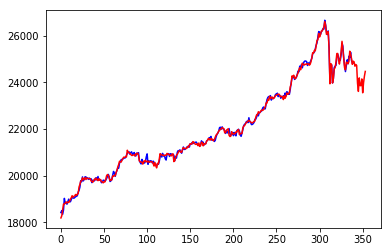

array([ 18422.90625   ,  18505.25390625,  18348.37695312,  18531.40625   ,
        19029.49414062,  18818.28125   ,  18859.03515625,  18779.85546875,
        18891.16601562,  18995.8125    ,  18892.5390625 ,  18885.07421875,
        18974.89453125,  19092.35742188,  19054.84960938,  19035.828125  ,
        19063.06054688,  19099.359375  ,  19121.45898438,  19140.3359375 ,
        19301.76171875,  19366.61523438,  19510.45898438,  19788.7109375 ,
        19742.02929688,  19949.42773438,  19777.38085938,  19838.32617188,
        19952.93359375,  19949.68359375,  19871.20703125,  19905.83203125,
        19841.68359375,  19900.08203125,  19844.77148438,  19872.6953125 ,
        19703.12890625,  19813.70117188,  19765.91601562,  19787.22265625,
        19895.24414062,  19910.5859375 ,  19807.6796875 ,  19966.59570312,
        19806.67578125,  19845.12890625,  19820.78125   ,  19699.25      ,
        19727.88867188,  19805.38867188,  19806.45703125,  19759.10742188,
        19809.98242188,  

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf


# #LSTM
# def lstm(X):
    
#     batch_size=tf.shape(X)[0]
#     time_step=tf.shape(X)[1]
#     w_in=weights['in']
#     b_in=biases['in']
#     input=tf.reshape(X,[-1,input_size])  
#     input_rnn=tf.matmul(input,w_in)+b_in
#     input_rnn=tf.reshape(input_rnn,[-1,time_step,rnn_unit])  
#     cell=tf.contrib.rnn.core_rnn_cell.BasicLSTMCell(rnn_unit, reuse = True)
#     init_state=cell.zero_state(batch_size,dtype=tf.float32)
#     output_rnn,final_states=tf.nn.dynamic_rnn(cell, input_rnn,initial_state=init_state, dtype=tf.float32)
#     output=tf.reshape(output_rnn,[-1,rnn_unit]) 
#     w_out=weights['out']
#     b_out=biases['out']
#     pred=tf.matmul(output,w_out)+b_out
#     return pred,final_states


# Model prediction
def prediction(time_step=20):
    X=tf.placeholder(tf.float32, shape=[None,time_step,input_size])
    mean,std,test_x,test_y=get_test_data(time_step)
    with tf.variable_scope("sec_lstm14",reuse=True):
        pred,_=lstm(X)
    saver=tf.train.Saver(tf.global_variables())
    with tf.Session() as sess:
        #read parameters
        module_file = tf.train.latest_checkpoint('./')
        saver.restore(sess, module_file)
        test_predict=[]
        for step in range(len(test_x)-1):
          prob=sess.run(pred,feed_dict={X:[test_x[step]]})
          predict=prob.reshape((-1))
          test_predict.extend(predict)
        test_y=np.array(test_y)*std[10]+mean[10]
        test_predict=np.array(test_predict)*std[10]+mean[10]
        acc=np.average(np.abs(test_predict-test_y[:len(test_predict)])/test_y[:len(test_predict)])  
        print("PMSE:",acc)
        
        plt.figure()
        plt.plot(list(range(len(test_predict))), test_predict, color='b',)
        plt.plot(list(range(len(test_y))), test_y,  color='r')
        plt.show()
    return test_predict

prediction()